ANN

In [ ]:
!pip install tensorflow


In [12]:
import tensorflow as tf

In [13]:
print(tf.__version__)

2.13.0


In [15]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

In [20]:
# Importing the dataset
dataset = pd.read_csv('resources/Churn_Modelling.csv')
X = dataset.iloc[:, 3:13]
y = dataset.iloc[:, 13]

<bound method NDFrame.head of       CreditScore Geography  Gender  Age  Tenure    Balance  NumOfProducts  \
0             619    France  Female   42       2       0.00              1   
1             608     Spain  Female   41       1   83807.86              1   
2             502    France  Female   42       8  159660.80              3   
3             699    France  Female   39       1       0.00              2   
4             850     Spain  Female   43       2  125510.82              1   
...           ...       ...     ...  ...     ...        ...            ...   
9995          771    France    Male   39       5       0.00              2   
9996          516    France    Male   35      10   57369.61              1   
9997          709    France  Female   36       7       0.00              1   
9998          772   Germany    Male   42       3   75075.31              2   
9999          792    France  Female   28       4  130142.79              1   

      HasCrCard  IsActiveMember  

In [22]:
#Create dummy variables
geography=pd.get_dummies(X["Geography"],drop_first=True)
gender=pd.get_dummies(X['Gender'],drop_first=True)

In [23]:
## Concatenate the Data Frames

X=pd.concat([X,geography,gender],axis=1)

## Drop Unnecessary columns
X=X.drop(['Geography','Gender'],axis=1)

# Splitting the dataset into the Training set and Test set
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)


In [25]:
# Feature Scaling   why fit_transform and transform 
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)


In [9]:
# Part 2 - Now let's make the ANN!

In [26]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.layers import LeakyReLU,PReLU,ELU
from tensorflow.keras.layers import Dropout


In [27]:
# Initialising the ANN
classifier = Sequential()

In [28]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(units=11,activation='relu'))

In [29]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(units=6,activation='relu'))

In [31]:
# Adding the input layer and the first hidden layer
classifier.add(Dense(1,activation='sigmoid'))
classifier.add(Dropout(0.2))

In [32]:
classifier.compile(optimizer='adam',loss='binary_crossentropy',metrics=['accuracy'])

In [35]:
early_stoping = tf.keras.callbacks.EarlyStopping(
    monitor="val_loss",
    min_delta=0.0001,
    patience=20,
    verbose=1,
    mode="auto",
    baseline=None,
    restore_best_weights=False,
    start_from_epoch=0,
)

In [36]:
model_history=classifier.fit(X_train,y_train,validation_split=0.33,batch_size=10,epochs=70, callbacks=early_stoping)

Epoch 1/70
536/536 [==============================] - 1s 2ms/step - loss: 0.3254 - accuracy: 0.8638 - val_loss: 0.3635 - val_accuracy: 0.8466
Epoch 2/70
536/536 [==============================] - 1s 2ms/step - loss: 0.3243 - accuracy: 0.8653 - val_loss: 0.3666 - val_accuracy: 0.8444
Epoch 3/70
536/536 [==============================] - 1s 2ms/step - loss: 0.3239 - accuracy: 0.8662 - val_loss: 0.3640 - val_accuracy: 0.8448
Epoch 4/70
536/536 [==============================] - 1s 2ms/step - loss: 0.3254 - accuracy: 0.8638 - val_loss: 0.3622 - val_accuracy: 0.8489
Epoch 5/70
536/536 [==============================] - 1s 2ms/step - loss: 0.3244 - accuracy: 0.8658 - val_loss: 0.3671 - val_accuracy: 0.8485
Epoch 6/70
536/536 [==============================] - 1s 2ms/step - loss: 0.3241 - accuracy: 0.8675 - val_loss: 0.3637 - val_accuracy: 0.8516
Epoch 7/70
536/536 [==============================] - 1s 2ms/step - loss: 0.3234 - accuracy: 0.8664 - val_loss: 0.3652 - val_accuracy: 0.8497
Epoch 

In [37]:
# list all data in history

print(model_history.history.keys())

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])


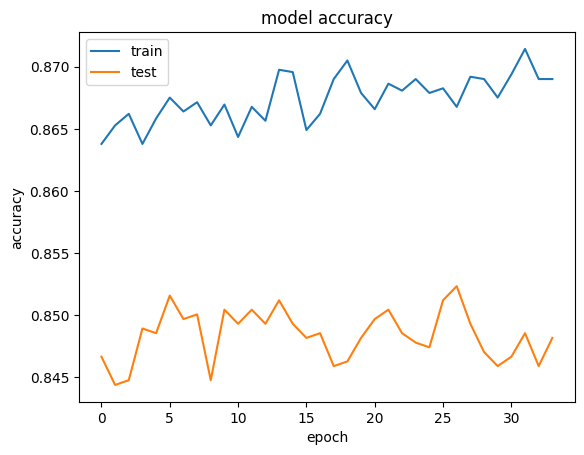

In [40]:

# summarize history for accuracy
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

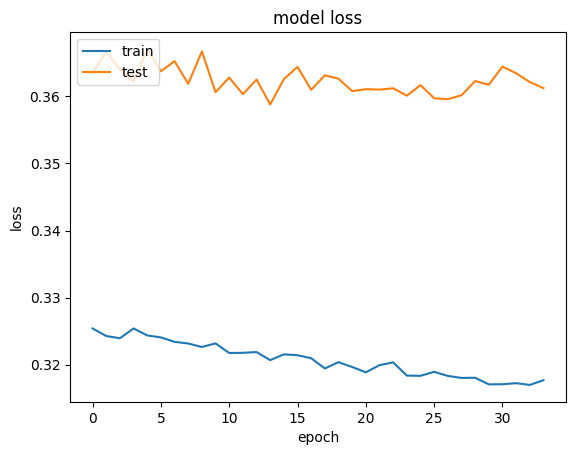

In [41]:
# summarize history for loss
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [47]:
# Part 3 - Making the predictions and evaluating the model

# Predicting the Test set results
y_pred = classifier.predict(X_test)
y_pred = (y_pred > 0.5)

63/63 [==============================] - 0s 1ms/step


In [48]:
# Making the Confusion Matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
cm

array([[1496,   99],
       [ 201,  204]], dtype=int64)

In [49]:
# Calculate the Accuracy
from sklearn.metrics import accuracy_score
score=accuracy_score(y_pred,y_test)

In [50]:
score

0.85